## Initialization

In [1]:
import sys
import os

# Add the parent directory to sys.path
sys.path.append(os.path.abspath(os.path.join('..')))
import torch
from kan_hnn import KANHNN
from data import get_dataset

## Help Functions

In [2]:
# print squared loss at specific steps for comparison with HNN
print_every = 200
def print_results(results, print_every=200):
    for step in range(0, len(results["train_loss"]), print_every):
        print(
            "step {}, train_loss {:.4e}, test_loss {:.4e}".format(
                step,
                results["train_loss"][step],
                results["test_loss"][step],
            )
        )

## Create Dataset

In [7]:
# create dataset
THIS_DIR = os.path.dirname(os.path.abspath(os.path.join(".")))
data = get_dataset("3body", THIS_DIR, verbose=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
x = torch.tensor(data["coords"], requires_grad=True, dtype=torch.float32).to(device)
test_x = torch.tensor(data["test_coords"], requires_grad=True, dtype=torch.float32).to(
    device
)
dxdt = torch.Tensor(data["dcoords"]).to(device)
test_dxdt = torch.Tensor(data["test_dcoords"]).to(device)

# dataset['train_input'], dataset['train_label'],dataset['test_input'], dataset['test_label']
dataset = {
    "train_input": x,
    "train_label": dxdt,
    "test_input": test_x,
    "test_label": test_dxdt,
}

Had a problem loading data from /Users/ZongyuWu/hamiltonian-nn/3body-orbits-dataset.pkl. Rebuilding dataset...
Making a dataset of near-circular 3-body orbits:


In [8]:
dataset["train_input"].shape, dataset["train_label"].shape

(torch.Size([80000, 12]), torch.Size([80000, 12]))

## Model Training

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# initialize KAN with G=3
model = KANHNN(
    input_dim=3 * 4, width=[3 * 4, 6, 4, 4, 2], grid=3, k=3, seed=42, device=device
)
results = model.fit(dataset, opt="LBFGS", steps=1000, log=1)
print_results(results, 10)

cpu
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.50e-01 | test_loss: 2.29e+00 | reg: 6.68e+01 | : 100%|█| 1000/1000 [4:02:23<00:00, 1

saving model version 0.1
step 0, train_loss 1.2757e+00, test_loss 1.6304e+00
step 10, train_loss 1.1208e+00, test_loss 1.4765e+00
step 20, train_loss 1.1268e+00, test_loss 1.4892e+00
step 30, train_loss 1.0744e+00, test_loss 1.4709e+00
step 40, train_loss 1.0477e+00, test_loss 1.4713e+00
step 50, train_loss 7.1929e-01, test_loss 2.1374e+00
step 60, train_loss 5.2053e-01, test_loss 1.2481e+00
step 70, train_loss 4.6048e-01, test_loss 1.1741e+00
step 80, train_loss 4.2788e-01, test_loss 3.7858e+00
step 90, train_loss 4.0516e-01, test_loss 2.3730e+00
step 100, train_loss 3.8802e-01, test_loss 3.4751e+00
step 110, train_loss 3.7514e-01, test_loss 3.6027e+00
step 120, train_loss 3.6573e-01, test_loss 1.6249e+00
step 130, train_loss 3.5841e-01, test_loss 1.6473e+00
step 140, train_loss 3.5334e-01, test_loss 1.6268e+00
step 150, train_loss 3.4778e-01, test_loss 1.8312e+00
step 160, train_loss 3.4382e-01, test_loss 1.8465e+00
step 170, train_loss 3.4088e-01, test_loss 1.9071e+00
step 180, trai

In [10]:
model.attribute()
print(model.node_scores)
model.plot()

IndexError: list index out of range

saving model version 0.2


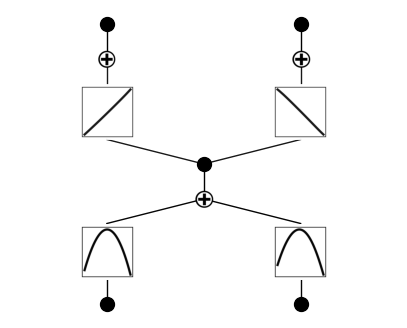

In [ ]:
model = model.prune_node(threshold=1e-1)
model.plot()

In [ ]:
mode = "manual"  # "manual"

if mode == "manual":
    # manual mode
    model.fix_symbolic(0, 0, 0, "x^2")
    model.fix_symbolic(0, 1, 0, "x^2")
    model.fix_symbolic(1, 0, 0, "x")
    model.fix_symbolic(1, 0, 1, "x")
elif mode == "auto":
    # automatic mode
    lib = ["x", "x^2", "x^3", "x^4", "sqrt", "tanh", "sin", "abs"]
    model.auto_symbolic(lib=lib)

r2 is 0.9998692274093628
saving model version 0.3
r2 is 0.9997871518135071
saving model version 0.4
Best value at boundary.
r2 is 0.9996123313903809
saving model version 0.5
r2 is 0.9998849630355835
saving model version 0.6


In [ ]:
from kan.utils import ex_round

[ex_round(y, 4) for y in model.symbolic_formula()[0]]

[-0.0255*(x_1 + 0.0005)**2 - 0.0258*(x_2 - 0.0056)**2 - 0.0127,
 0.9815*(x_1 + 0.0005)**2 + 0.9925*(x_2 - 0.0056)**2 - 0.8103]

![hnn](./hnn.png)
![baseline](./baseline.png)
